In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
#import warnings
#warnings.filterwarnings('ignore')

# Make a reference to the mousedata.csv files
csv_path_drug = "data/mouse_drug_data.csv"
csv_path_trial = "data/clinicaltrial_data.csv"

# File to Load (Remember to Change These)
#mouse_drug_data_to_load = "data/mouse_drug_data.csv"
#clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
# Import the purchase_data.csv file as a DataFrame
mouse_drug_df = pd.read_csv(csv_path_drug, encoding="utf-8")
mouse_drug_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
Mouse ID    250 non-null object
Drug        250 non-null object
dtypes: object(2)
memory usage: 4.0+ KB


In [2]:
clinical_trial_df = pd.read_csv(csv_path_trial, encoding="utf-8")
clinical_trial_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [3]:
# Combine the data into a single dataset
# Merge the two DataFrames together based on the Dates they share
mouse_trial_df = pd.merge(mouse_drug_df, clinical_trial_df, on="Mouse ID")


# Display the data table for preview
mouse_trial_df.info()
mouse_trial_df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
Mouse ID              1906 non-null object
Drug                  1906 non-null object
Timepoint             1906 non-null int64
Tumor Volume (mm3)    1906 non-null float64
Metastatic Sites      1906 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0           45.000000                 0
1     f234  Stelasyn          5           47.313491                 0
2     f234  Stelasyn         10           47.904324                 0
3     f234  Stelasyn         15           48.735197                 1
4     f234  Stelasyn         20           51.112713                 2

## Tumor Response to Treatment

In [38]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_trial = mouse_trial_df.groupby (["Drug","Timepoint"])
#timepoint = group_trial["Timepoint"]
avg_tumor_vol = group_trial["Tumor Volume (mm3)"].agg(np.mean)
ste_tumor_vol = group_trial["Tumor Volume (mm3)"].agg(np.std)
#avg_tumor_vol
# Convert to DataFrame
group_trial_df = pd.DataFrame({ #"Timepoint": timepoint,
                               "Avg Tumor Volume": avg_tumor_vol,
                              "Tumor Volume Std Error": ste_tumor_vol})
# Preview DataFrame

group_trial_df.info()
group_trial_df.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100 entries, (Capomulin, 0) to (Zoniferol, 45)
Data columns (total 2 columns):
Avg Tumor Volume          100 non-null float64
Tumor Volume Std Error    100 non-null float64
dtypes: float64(2)
memory usage: 2.0+ KB


Avg Tumor Volume  Tumor Volume Std Error
Drug      Timepoint                                          
Capomulin 0                 45.000000                0.000000
          5                 44.266086                2.242964
          10                43.084291                3.513422
          15                42.064317                4.108369
          20                40.716325                4.362915

In [34]:
# Minor Data Munging to Re-Format the Data Frames
munged_data = group_trial_df.reset_index()
# Preview that Reformatting worked
munged_data.info()
munged_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
Drug                      100 non-null object
Timepoint                 100 non-null int64
Avg Tumor Volume          100 non-null float64
Tumor Volume Std Error    100 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


Drug  Timepoint  Avg Tumor Volume  Tumor Volume Std Error
0   Capomulin          0         45.000000                0.000000
1   Capomulin          5         44.266086                2.242964
2   Capomulin         10         43.084291                3.513422
3   Capomulin         15         42.064317                4.108369
4   Capomulin         20         40.716325                4.362915
5   Capomulin         25         39.939528                4.135268
6   Capomulin         30         38.769339                4.383004
7   Capomulin         35         37.816839                4.935447
8   Capomulin         40         36.958001                5.607278
9   Capomulin         45         36.236114                5.608969
10   Ceftamin          0         45.000000                0.000000
11   Ceftamin          5         46.503051                0.753856
12   Ceftamin         10         48.285125                1.056070
13   Ceftamin         15         50.094055                1.447385
14   Ceftamin         20         52.157049                1.525155
15   Ceftamin         25         54.287674                1.864031
16   Ceftamin         30         56.769517                1.962481
17   Ceftamin         35         58.827548                2.590153
18   Ceftamin         40         61.467895                2.650983
19   Ceftamin         45         64.132421                3.253497
20  Infubinol          0         45.000000                0.000000
21  Infubinol          5         47.062001                1.175512
22  Infubinol         10         49.403909                1.293872
23  Infubinol         15         51.296397                1.639210
24  Infubinol         20         53.197691                2.129674
25  Infubinol         25         55.715252                2.334787
26  Infubinol         30         58.299397                2.601931
27  Infubinol         35         60.742461                3.409213
28  Infubinol         40         63.162824                3.336898
29  Infubinol         45         65.755562                3.433282
..        ...        ...               ...                     ...
70   Ramicane          0         45.000000                0.000000
71   Ramicane          5         43.944859                2.414777
72   Ramicane         10         42.531957                3.528366
73   Ramicane         15         41.495061                3.774331
74   Ramicane         20         40.238325                3.770480
75   Ramicane         25         38.974300                3.582445
76   Ramicane         30         38.703137                4.147942
77   Ramicane         35         37.451996                4.433337
78   Ramicane         40         36.574081                5.046561
79   Ramicane         45         34.955595                5.486439
80   Stelasyn          0         45.000000                0.000000
81   Stelasyn          5         47.527452                1.199312
82   Stelasyn         10         49.463844                2.079848
83   Stelasyn         15         51.529409                2.365597
84   Stelasyn         20         54.067395                2.849853
85   Stelasyn         25         56.166123                3.233965
86   Stelasyn         30         59.826738                3.816460
87   Stelasyn         35         62.440699                4.012745
88   Stelasyn         40         65.356386                4.885891
89   Stelasyn         45         68.438310                5.228845
90  Zoniferol          0         45.000000                0.000000
91  Zoniferol          5         46.851818                0.925664
92  Zoniferol         10         48.689881                1.238033
93  Zoniferol         15         50.779059                1.698048
94  Zoniferol         20         53.170334                2.198367
95  Zoniferol         25         55.432935                2.410052
96  Zoniferol         30         57.713531                3.098552
97  Zoniferol         35         60.089372              

In [52]:
df = pd.DataFrame(munged_data)
pivot_data = df.pivot(index='Timepoint', columns='Drug', values='Avg Tumor Volume')
pivot_data.info()
pivot_data.head(10)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 45
Data columns (total 10 columns):
Capomulin    10 non-null float64
Ceftamin     10 non-null float64
Infubinol    10 non-null float64
Ketapril     10 non-null float64
Naftisol     10 non-null float64
Placebo      10 non-null float64
Propriva     10 non-null float64
Ramicane     10 non-null float64
Stelasyn     10 non-null float64
Zoniferol    10 non-null float64
dtypes: float64(10)
memory usage: 880.0 bytes


Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334  
25         55.504138  38.974300  56.166123  55.432935  
30         58.196374  38.703137  59.826738  57.713531  
35         60.350199  37.451996  62.440699  60.089372  
40         63.045537  36.574081  65.356386  62.916692  
45         66.258529  34.955595  68.438310  65.960888

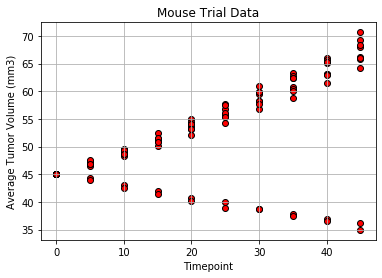

In [47]:
# Generate the Plot (with Error Bars)
plt.scatter(munged_data["Timepoint"], munged_data["Avg Tumor Volume"], marker="o", 
                                    facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.title("Mouse Trial Data")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.grid(True)

# Save the figure
plt.savefig("MouseTrialData.png")

# Show plot
plt.show()


In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)